In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("/content/Modified_ECG_file.csv")
df.head()

In [11]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [30]:
# used for to del Previous Model
del model
#Regression Model
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Regression Compilation
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Train
history = model.fit(
    X_train, y_train,
    epochs=7,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
# Test(Evalute)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", acc)

Epoch 1/7
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.7958 - mean_absolute_error: 3.0736 - val_loss: 16.9779 - val_mean_absolute_error: 2.9971
Epoch 2/7
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.8959 - mean_absolute_error: 3.1579 - val_loss: 16.9771 - val_mean_absolute_error: 2.9899
Epoch 3/7
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.2407 - mean_absolute_error: 3.1280 - val_loss: 16.9597 - val_mean_absolute_error: 2.9859
Epoch 4/7
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.0301 - mean_absolute_error: 3.2039 - val_loss: 16.9435 - val_mean_absolute_error: 2.9814
Epoch 5/7
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.4348 - mean_absolute_error: 3.2044 - val_loss: 16.9355 - val_mean_absolute_error: 2.9661
Epoch 6/7
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.5533 - mean_absolute_error: 3.1916 - val_loss: 16.9204 - val_mean_absolute_error: 2.9735
Epoch 7/7
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.2653 - mean_absolute_error: 3.1557 - val_loss:

In [22]:
# Neural Network in TensorFlow
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 4.0854e-08 
Test Accuracy: 0.0


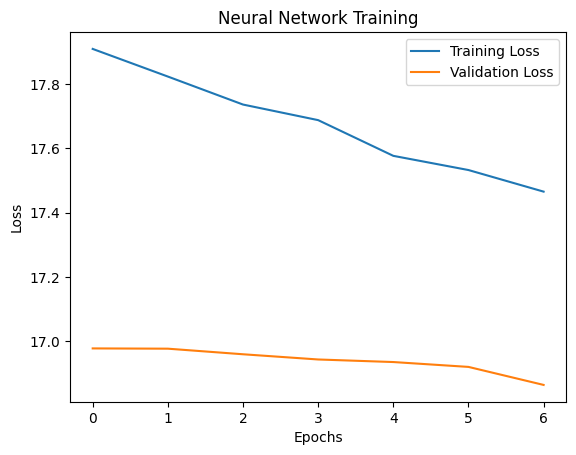

In [24]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network Training")
plt.legend()
plt.show()

In [29]:
nn_pred = model.predict(X_test).flatten()
nn_r2 = r2_score(y_test, nn_pred)
nn_mae = mean_absolute_error(y_test, nn_pred)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
nn_r2, nn_mae, nn_rmse

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


(0.0013271365852254302, 4.260747028067551, np.float64(5.129026856726048))

In [32]:
model.save("model_nn.h5")